## Data preprocessing and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import pmagpy.ipmag as ipmag

from utils.geometry import cartesian2spherical, spherical2cartesian
from utils.smooth import running_mean_APWP

In [3]:
max_age = 130   # Maximum ages in the past to explore

In [4]:
df = pd.read_csv('data/Torsvik-etal-2012_dataset.csv', encoding="cp1254")
df = df[df.Age < max_age]

# For PPs in African coordinate system, we just replace the actual latitude and longitude 
df.RLat.fillna(df.Lat, inplace=True)
df.RLon.fillna(df.Lon, inplace=True)

# Add cartesian coordinates
df['x'] = df.apply(lambda row: spherical2cartesian([np.radians(row["RLat"]), np.radians(row.RLon)])[0], axis=1) 
df['y'] = df.apply(lambda row: spherical2cartesian([np.radians(row["RLat"]), np.radians(row.RLon)])[1], axis=1) 
df['z'] = df.apply(lambda row: spherical2cartesian([np.radians(row["RLat"]), np.radians(row.RLon)])[2], axis=1) 

df.head()

,Q,a95,Plate,Plate_code,Lat,Lon,CLat,CLon,RLat,RLon,Eplat,Eplong,Epang,Age,x,y,z
0,5,4.8,north_america,101,-86.3,5.7,NaN,NaN,-86.3,5.7,NaN,NaN,NaN,0.5,0.064213,0.006409,-0.997916
1,5,9.1,north_america,101,-86.4,8.4,NaN,NaN,-86.4,9.2,79.2,23.0,0.2,0.8,0.061983,0.010039,-0.998027
2,5,7.1,north_america,101,-85.3,265.9,NaN,NaN,-85.3,-94.1,79.9,22.7,0.3,1.0,-0.005858,-0.081729,-0.996637
3,5,8.7,north_america,101,-88.4,225.5,NaN,NaN,-88.4,-135.7,79.9,22.7,0.3,1.0,-0.019983,-0.019501,-0.999610
4,5,4.3,north_america,101,-88.9,285.0,NaN,NaN,-88.9,-75.1,79.9,22.7,0.3,1.0,0.004936,-0.018552,-0.999816


We can see which are the sites on the globe where more studies where perform:

In [5]:
df.Plate.value_counts()

north_america       66
europe              29
East_Gondwana       16
Northeast_Africa    16
greenland           11
Somalia             10
Amazonia            10
Madagascar           9
Northwest_Africa     5
East_Antarctica      4
Patagonia            4
Parana               4
Arabia               3
Australia            3
Southern_Africa      2
Colorado             1
Meseta               1
Name: Plate, dtype: int64

We can plot the set of all paleomagnetic poles. We can see that the dispersion is quite large, and it is not simple to see an obvious patter. However, we can see how the poles get apart of the south pole as we go backwards in time. 

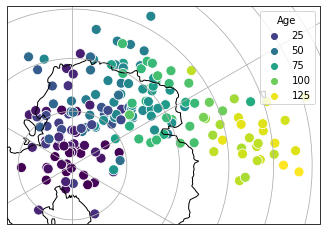

In [6]:
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-90))

ax.coastlines()
ax.gridlines()

sns.scatterplot(ax=ax, x = df['RLon'], y = df['RLat'], 
                hue = df['Age'], s=100,
                palette="viridis",
                transform = ccrs.PlateCarree());

#plt.savefig("PPs.pdf", format="pdf", bbox_inches="tight")

Now, we can define a running mean that averages the PPs around their Fisherian mean on the sphere

In [11]:
df_RM = running_mean_APWP(df, 20, 5, max_age, 0)
df_RM.head(5)

,Age,N,a95,RLon,RLat
0,0.0,35.0,1.648784,340.213364,-87.177248
5,5.0,45.0,1.825821,346.128019,-86.233805
10,10.0,49.0,1.825078,349.513231,-86.377415
15,15.0,33.0,2.494419,349.739774,-84.714787
20,20.0,31.0,2.605800,356.972852,-83.497311


In [12]:
map_axis = ipmag.make_orthographic_map(central_longitude=0, central_latitude=-90, figsize=(10,10))

ipmag.plot_poles_colorbar(map_axis, df_RM.RLon.tolist(), df_RM.RLat.tolist(), 
                 df_RM.a95.tolist(), df_RM.Age.tolist(),0,max_age)
plt.title('running mean APWP (20 Myr window)');

#plt.savefig("RM.pdf", format="pdf", bbox_inches="tight")

AttributeError: can't set attribute 'threshold'

<Figure size 720x720 with 0 Axes>

In [13]:
map_axis = ipmag.make_orthographic_map()

AttributeError: can't set attribute 'threshold'

<Figure size 576x576 with 0 Axes>

In [14]:
ipmag.make_orthographic_map?

Signature:
ipmag.make_orthographic_map(
    central_longitude=0,
    central_latitude=0,
    figsize=(8, 8),
    add_land=True,
    land_color='tan',
    land_edge_color='black',
    add_ocean=False,
    ocean_color='lightblue',
    grid_lines=True,
    lat_grid=[-80.0, -60.0, -30.0, 0.0, 30.0, 60.0, 80.0],
    lon_grid=[-180.0, -150.0, -120.0, -90.0, -60.0, -30.0, 0.0, 30.0, 60.0, 90.0, 120.0, 150.0, 180.0],
)
Docstring:
Function creates and returns an orthographic map projection using cartopy

Example
-------
>>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)

Optional Parameters
-----------
central_longitude : central longitude of projection (default is 0)
central_latitude : central latitude of projection (default is 0)
figsize : size of the figure (default is 8x8)
add_land : chose whether land is plotted on map (default is true)
land_color : specify land color (default is 'tan')
add_ocean : chose whether land is plotted on map (default is False, change 